# MAT555 
Second Homework 

Murat Teksin 
504211325 

teksin16@itu.edu.tr

# Opening Informations 

Libraries that are used for all question are the same. So firstly libraries are imported.

In this application ols and anova_lm framework used. 

OLS stands for Ordinary Least Squares. OLS technic is used for optimization with formula:

x* = min||Ax-y||^2

This technic aims to minimize distance of a point from the regression line.

Also anova_lm is used for linear models as analysis of varience. With anova_lm analysis p value can be obtained and significiant columns can be chosen.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.datasets import copper
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Question 1 

Data set imported from statsmodels.

Values in this dataset covers the years from 1951 to 1975. Outcome variable is world consumption of copper. Copper data set has 6 columns. These are:

WORLDCONSUMPTION - World consumption of copper (in 1000 metric tons)

COPPERPRICE - Constant dollar adjusted price of copper

INCOMEINDEX - An index of real per capita income (base 1970)

ALUMPRICE - The price of aluminum

INVENTORYINDEX - A measure of annual manufacturer inventory
trend

TIME - A time trend


TIME variant also used for indexing.

In [21]:
from statsmodels.datasets import copper

prices = copper.data.load_pandas()
df = prices['data']
df.index = df['TIME']

NULL variable is a problem for regression. So we check it.

In [22]:
print(df.shape)
print(df.isnull().sum())

(25, 6)
WORLDCONSUMPTION    0
COPPERPRICE         0
INCOMEINDEX         0
ALUMPRICE           0
INVENTORYINDEX      0
TIME                0
dtype: int64


With no NULL variable we can take a look variables.

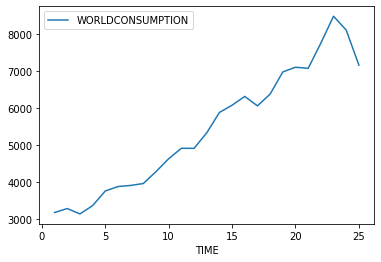

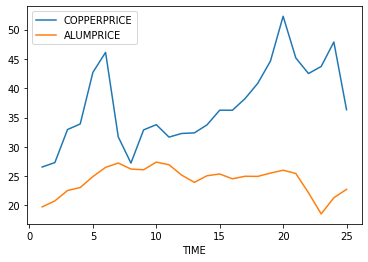

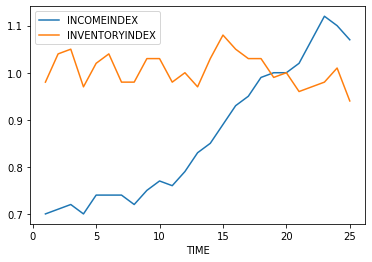

In [23]:
df['WORLDCONSUMPTION'].plot(legend=True)
df[['COPPERPRICE','ALUMPRICE']].plot()
df[['INCOMEINDEX','INVENTORYINDEX']].plot()

We can also check correlation map of variables to obtain the relationship of variables. Below, the red squares show that the variable has a strong positive realtion with each other and the white squares say no relations. Blue part says there is a negative relation with each other but in this dataset there is no strong negative relationship. 

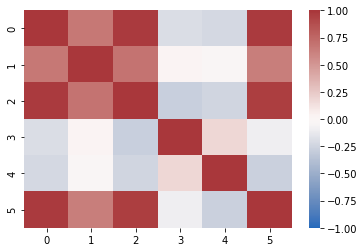

In [24]:
corr = np.corrcoef(df.T)
sns.heatmap(corr,cmap='vlag',vmin=-1,vmax=1)

After some observations, model is builded and R-squared value has 0.978. 

R_squared value shows the how much the varience of model line match with the real dataset varience. While it close to 1, model accepted as succesful depend on the significiance. 

In [30]:
model_1= ols('WORLDCONSUMPTION  ~   INCOMEINDEX +  INVENTORYINDEX + TIME + COPPERPRICE   + ALUMPRICE   ',df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     171.0
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           4.11e-15
Time:                        17:35:46   Log-Likelihood:                -172.61
No. Observations:                  25   AIC:                             357.2
Df Residuals:                      19   BIC:                             364.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        283.9552   2768.572      0.103      0.919   -5510.733    6078.644
INCOMEINDEX     1442.8858   3168.592      0.455      0.654   -5189.054    8074.826
INVENTORYINDEX  2450.3845   1827.270      1.341      0.196   -1374.136    6274.905
TIME             187.2307     54.595      3.429      0.003      72.961     301.500
COPPERPRICE       15.0432     14.761      1.019      0.321     -15.852      45.938
ALUMPRICE        -64.1230     47.258     -1.357      0.191    -163.035      34.789
==============================================================================
Omnibus:                        8.395   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                6.465
Skew:                          -0.959   Prob(JB):                       0.0395
Kurtosis:                       4.589   Cond. No.                     3.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model summary shows INCOMEINDEX and INVERNTORYINDEX have higher coefficient value. First let's try constract a model with these variables.

In [34]:
model_new = ols('WORLDCONSUMPTION ~ INCOMEINDEX + INVENTORYINDEX',df).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     241.8
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           1.06e-15
Time:                        17:49:49   Log-Likelihood:                -181.29
No. Observations:                  25   AIC:                             368.6
Df Residuals:                      22   BIC:                             372.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4866.3418   2368.682     -2.054      0.052   -9778.687      46.004
INCOMEINDEX     1.134e+04    529.215     21.423      0.000    1.02e+04    1.24e+04
INVENTORYINDEX   474.5721   2204.839      0.215      0.832   -4097.984    5047.128
==============================================================================
Omnibus:                        0.129   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.937   Jarque-Bera (JB):                0.351
Skew:                          -0.002   Prob(JB):                        0.839
Kurtosis:                       2.420   Cond. No.                         73.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It also has acceptable R_squared value but it can be better. So we check the anova_lm values.

In [31]:
anova_lm(model_1)

,df,sum_sq,mean_sq,F,PR(>F)
INCOMEINDEX,1.0,6.398709e+07,6.398709e+07,836.030131,3.594166e-17
INVENTORYINDEX,1.0,6.129379e+03,6.129379e+03,0.080084,7.802437e-01
TIME,1.0,1.311071e+06,1.311071e+06,17.129943,5.580145e-04
COPPERPRICE,1.0,4.457845e+03,4.457845e+03,0.058244,8.118778e-01
ALUMPRICE,1.0,1.409116e+05,1.409116e+05,1.841096,1.907255e-01
Residual,19.0,1.454200e+06,7.653682e+04,NaN,NaN


These result shows INCOMEINDEX significiant but TIME value is more significiant variable than INVENTORYINDEX since its Pr value lower than it.
New model is constracted with these variables and the result better than the old models. 

In [29]:
model_1new = ols('WORLDCONSUMPTION ~ INCOMEINDEX + TIME ', data=df).fit()
model_1new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     427.2
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           2.49e-18
Time:                        17:35:33   Log-Likelihood:                -174.41
No. Observations:                  25   AIC:                             354.8
Df Residuals:                      22   BIC:                             358.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -831.4015    942.545     -0.882      0.387   -2786.120    1123.317
INCOMEINDEX  5443.3083   1508.845      3.608      0.002    2314.154    8572.462
TIME          119.1501     29.596      4.026      0.001      57.772     180.529
==============================================================================
Omnibus:                        9.159   Durbin-Watson:                   1.246
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                7.820
Skew:                          -0.928   Prob(JB):                       0.0200
Kurtosis:                       5.016   Cond. No.                         480.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question 2

Second question about as 6 attributes and 906 chemicals used to predicts aquatic toxicity.


Same prodecures are applied to this dataset.

In [2]:
fish = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv',
                   sep=';',
                   header=None,
                   names=['CIC0','SM1_DzZ','GATS1i','NdsCH','NdssC','MLOGP','quantitive_response'])
fish.head()

,CIC0,SM1_DzZ,GATS1i,NdsCH,NdssC,MLOGP,quantitive_response
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [38]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CIC0                 908 non-null    float64
 1   SM1_DzZ              908 non-null    float64
 2   GATS1i               908 non-null    float64
 3   NdsCH                908 non-null    int64  
 4   NdssC                908 non-null    int64  
 5   MLOGP                908 non-null    float64
 6   quantitive_response  908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


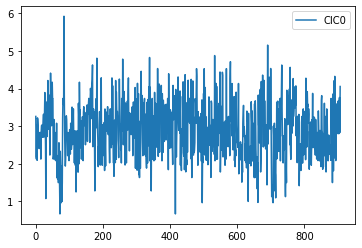

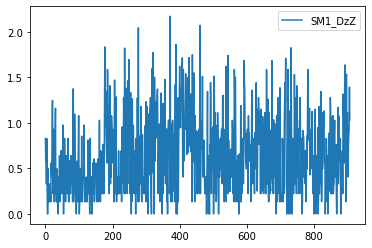

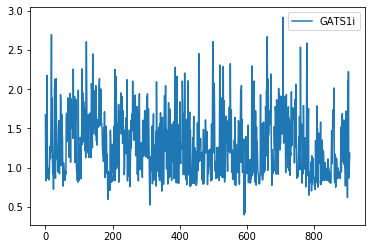

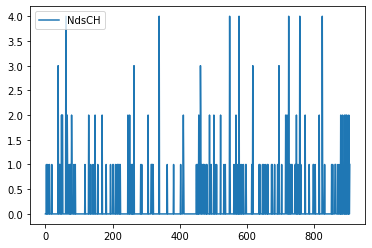

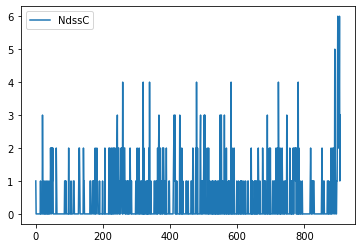

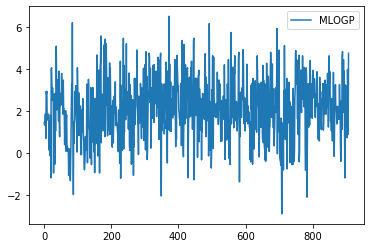

In [80]:
for i in range (6):
    fish.iloc[:,i:i+1].plot()

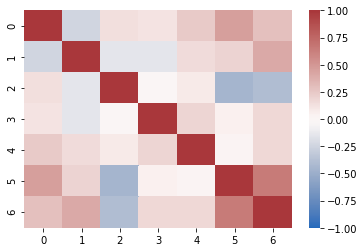

In [65]:
corr = np.corrcoef(fish.T)
sns.heatmap(corr,cmap='vlag',vmin=-1,vmax=1)

In dataset 6th(quantitive_response) column posivite correlate with 5th (MLOGP) column most. Also, 6th column has negative correlation with 2nd (GATS1i) column.

In [30]:
model_2 = ols('quantitive_response  ~ MLOGP + SM1_DzZ +  CIC0 +  GATS1i + NdsCH + NdssC ',fish).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     quantitive_response   R-squared:                       0.577
Model:                             OLS   Adj. R-squared:                  0.574
Method:                  Least Squares   F-statistic:                     205.0
Date:                 Tue, 29 Mar 2022   Prob (F-statistic):          1.33e-164
Time:                         21:09:23   Log-Likelihood:                -1238.0
No. Observations:                  908   AIC:                             2490.
Df Residuals:                      901   BIC:                             2524.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1746      0.181     12.000      0.000       1.819       2.530
MLOGP          0.3901      0.034     11.555      0.000       0.324       0.456
SM1_DzZ        1.2556      0.087     14.430      0.000       1.085       1.426
CIC0           0.3856      0.061      6.333      0.000       0.266       0.505
GATS1i        -0.7464      0.101     -7.365      0.000      -0.945      -0.548
NdsCH          0.4136      0.054      7.644      0.000       0.307       0.520
NdssC          0.0643      0.041      1.583      0.114      -0.015       0.144
==============================================================================
Omnibus:                      100.278   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              379.239
Skew:                           0.468   Prob(JB):                     4.46e-83
Kurtosis:                       6.024   Cond. No.                         25.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The result is not acceptable with this score. So linear model can't cover this dataset. We can use different model like KNN. We must import new libraries for that.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

First dataset turns into array type to put KNN model.

In [5]:
x = fish.iloc[:, :6]
y = fish.iloc[:, 6:]

This model work with train and test set. So dataset is divided into two piece.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42 )

For KNN, a loop applied to find best number of centers.

In [7]:
knn_result = []

for k in range (2, 10):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    knn_result.append(knn.score(x_train, y_train))
    print('R-Squared for k = {} : {}'.format(k, knn.score(x_train, y_train)))

R-Squared for k = 2 : 0.8441991920629526
R-Squared for k = 3 : 0.7896715659763686
R-Squared for k = 4 : 0.7501446015403908
R-Squared for k = 5 : 0.7290712188989004
R-Squared for k = 6 : 0.7108314852659325
R-Squared for k = 7 : 0.6958454518412134
R-Squared for k = 8 : 0.6829107271764532
R-Squared for k = 9 : 0.6759635279814535


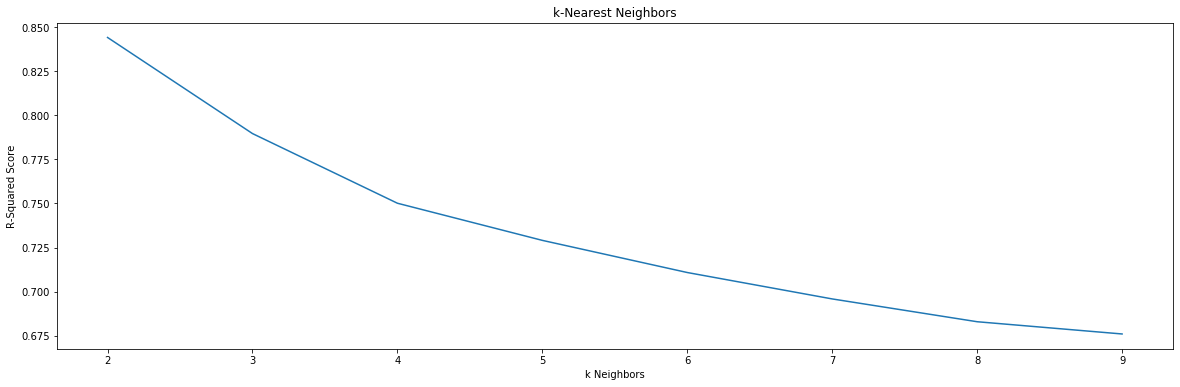

In [8]:
plt.figure(figsize=(20,6))
plt.plot([i for i in range(2, 10)], knn_result)
plt.xlabel('k Neighbors')
plt.ylabel('R-Squared Score')
plt.title('k-Nearest Neighbors')
plt.show()

It can be observed from figure best KNN score is taken at 2 centers.

In [20]:
knn = KNeighborsRegressor(n_neighbors=2).fit(x_train,y_train)
knn_training_pred = knn.predict(x_train)
knn_testing_pred = knn.predict(x_test)
knn_testing_rsq = knn.score(x_test,y_test)
knn_testing_rmse = np.sqrt(mean_squared_error(y_test, knn_testing_pred))

print('R-Squared for the testing set :', knn_testing_rsq)
print('RMSE for the testing set :', knn_testing_rmse)

R-Squared for the testing set : 0.5199303054367466
RMSE for the testing set : 1.0777370235975783


KNN Model is used but R-Squared score still unsatified. So lastly SVR is tried.

In [24]:
svr_rbf = SVR('rbf').fit(x_train,y_train)
y_pred = svr_rbf.predict(x_test)
svr_testing_rsq = svr.score(x_test,y_test)
svr_testing_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('R-Squared for the testing set :', svr_testing_rsq)
print('RMSE for the testing set :', svr_testing_rmse)

R-Squared for the testing set : 0.6053177494322509
RMSE for the testing set : 0.9772022425120014


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR model gives better result but still has low R-Squared score. So better model can't be constructed in this question.

If ANOVA  used for OLS:

In [31]:
anova_lm(model_2)

,df,sum_sq,mean_sq,F,PR(>F)
MLOGP,1.0,816.201939,816.201939,904.898545,3.445017e-138
SM1_DzZ,1.0,157.149715,157.149715,174.227163,1.697707e-36
CIC0,1.0,20.862798,20.862798,23.129956,1.774047e-06
GATS1i,1.0,52.803861,52.803861,58.542053,5.108867e-14
NdsCH,1.0,60.021236,60.021236,66.543739,1.143837e-15
NdssC,1.0,2.260502,2.260502,2.506151,1.137536e-01
Residual,901.0,812.685523,0.901982,NaN,NaN


Pr Scores has minimun value at MLOGP, SM1_DzZ, GATS1i and NdsCH. Anova_lm also gives different scores for different line combination so it's better to be careful.

In [32]:
model_2_new = ols('quantitive_response  ~ MLOGP + SM1_DzZ +  GATS1i + NdsCH ',fish).fit()
model_2_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     quantitive_response   R-squared:                       0.551
Model:                             OLS   Adj. R-squared:                  0.549
Method:                  Least Squares   F-statistic:                     277.3
Date:                 Tue, 29 Mar 2022   Prob (F-statistic):          1.93e-155
Time:                         21:14:52   Log-Likelihood:                -1265.1
No. Observations:                  908   AIC:                             2540.
Df Residuals:                      903   BIC:                             2564.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6861      0.163     16.518      0.000       2.367       3.005
MLOGP          0.5372      0.026     20.875      0.000       0.487       0.588
SM1_DzZ        1.0713      0.078     13.663      0.000       0.917       1.225
GATS1i        -0.4117      0.092     -4.457      0.000      -0.593      -0.230
NdsCH          0.4561      0.054      8.397      0.000       0.350       0.563
==============================================================================
Omnibus:                      122.055   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.945
Skew:                           0.630   Prob(JB):                     5.81e-90
Kurtosis:                       6.045   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So the results are not satisfying. Model couldn't be turn a useful model.

# Question 3

In [2]:
interconnections = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
                               sep=',',
                               header=None)
interconnections.head()

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [3]:
interconnections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, 0 to 146
dtypes: float64(75), int64(29), object(43)
memory usage: 2.5+ MB


Sources:

https://www.statsmodels.org/dev/datasets/generated/copper.html

https://www.reneshbedre.com/blog/anova.html

https://towardsdatascience.com/ordinary-least-squares-regression-da96dde239d5

https://programmathically.com/ordinary-least-squares-regression/

https://github.com/trizkynoviandy/qsar-fish-toxicity